In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import shapefile as shp
import geopandas as geopandas
from shapely.geometry import Point

In [2]:
us_map = geopandas.read_file('US_map/states.shp')

In [3]:
us_map.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


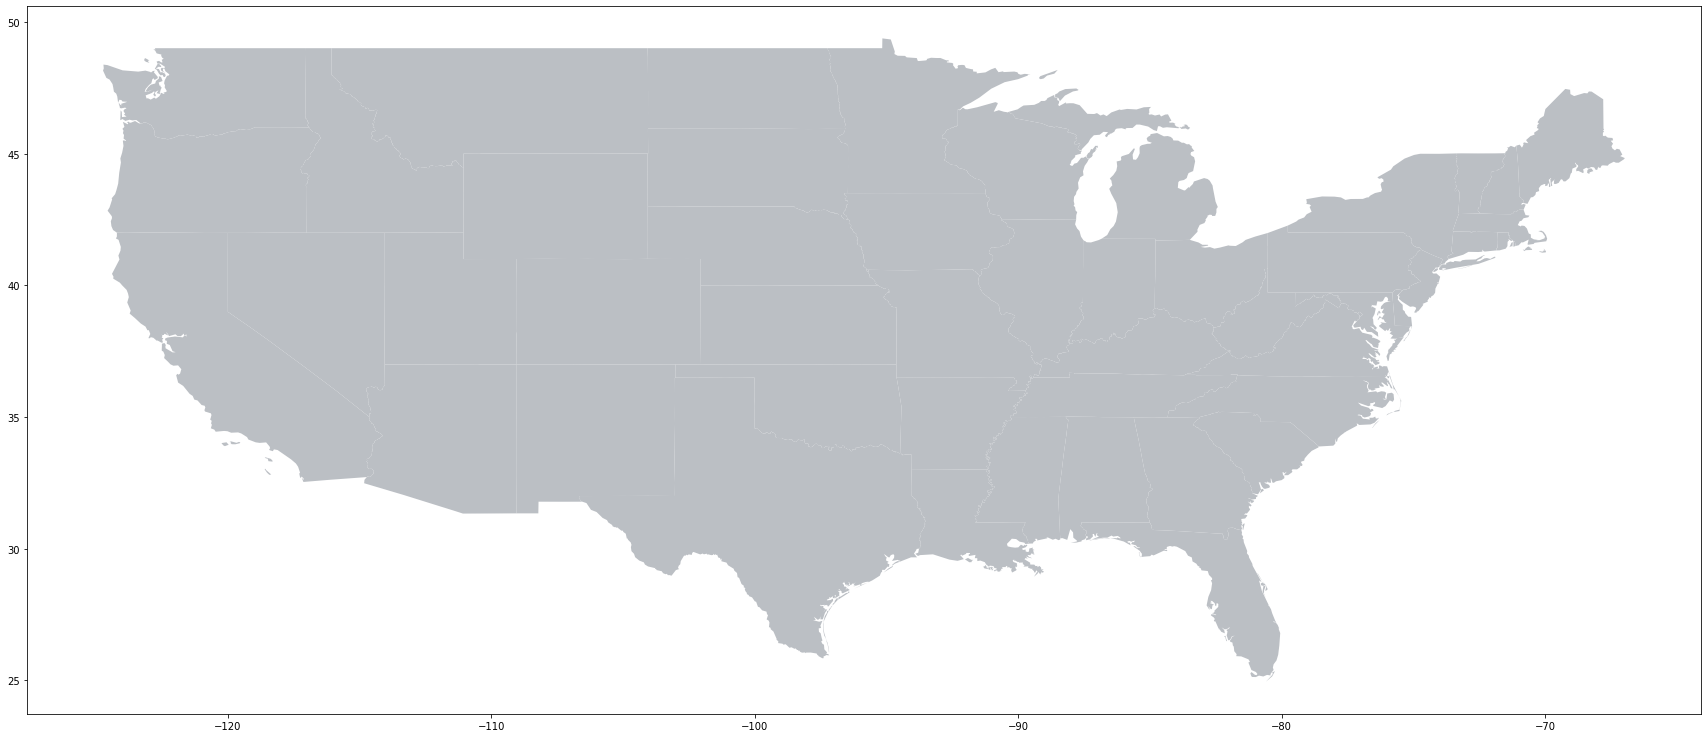

In [4]:
us_map[us_map['STATE_NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#BBBFC4');


In [5]:
df = pd.read_csv('NREL_Stations.csv')
crs = {'init': 'epsg:4326'}
df.head()

,STATION_ID,STATION_FULLNAME,STATION_SHORTNAME,RESERVED,LATITUDE_DEG,LONGITUDE_DEG,ELEVATION_M
0,RCS,ARM Radiometer Characterization System (RCS),ARM RCS,0,36.60600,-97.48600,320.0
1,BS,Bluefield State College,BSC,0,37.26500,-81.24000,803.0
2,EC,Elizabeth City State University,ECSU,0,36.28200,-76.21600,26.0
3,HSU,Humboldt State University (SoRMS),HSU SoRMS,0,40.87600,-124.08000,36.0
4,LRSS,Lowry Range Solar Station (RSR),LRSS,0,39.60701,-104.58017,1860.0


In [6]:
geometry = [Point(xy) for xy in zip (df['LONGITUDE_DEG'], df['LATITUDE_DEG'])]
geometry[:3]

In [7]:
geo_df = geopandas.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

,STATION_ID,STATION_FULLNAME,STATION_SHORTNAME,RESERVED,LATITUDE_DEG,LONGITUDE_DEG,ELEVATION_M,geometry
0,RCS,ARM Radiometer Characterization System (RCS),ARM RCS,0,36.60600,-97.48600,320.0,POINT (-97.486 36.606)
1,BS,Bluefield State College,BSC,0,37.26500,-81.24000,803.0,POINT (-81.23999999999999 37.265)
2,EC,Elizabeth City State University,ECSU,0,36.28200,-76.21600,26.0,POINT (-76.21600000000001 36.282)
3,HSU,Humboldt State University (SoRMS),HSU SoRMS,0,40.87600,-124.08000,36.0,POINT (-124.08 40.876)
4,LRSS,Lowry Range Solar Station (RSR),LRSS,0,39.60701,-104.58017,1860.0,POINT (-104.58017 39.60701)


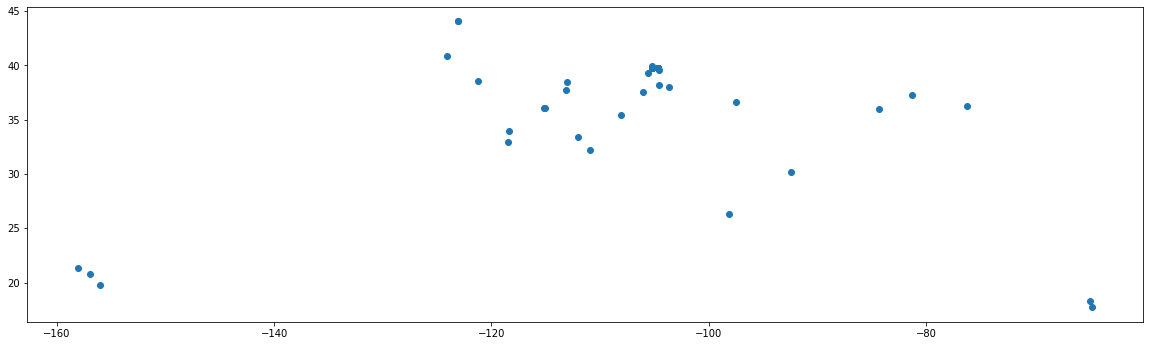

In [8]:
geo_df.plot(figsize= (20,10))

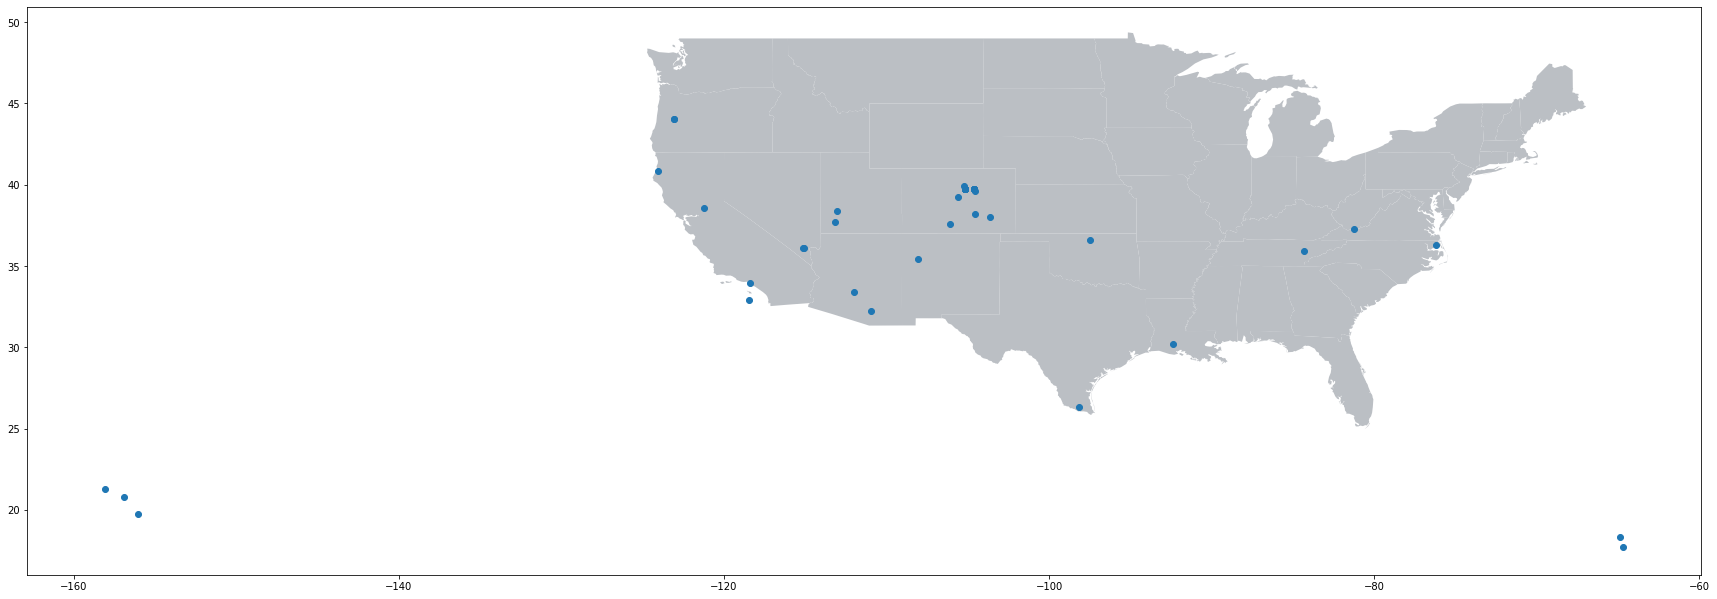

In [9]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_map[us_map['STATE_NAME'].isin(['Alaska','Hawaii'])== False].plot(ax=ax, color='#BBBFC4')
geo_df.plot(ax=base);

In [10]:
df2 = pd.read_csv('Solar_Sites.csv')
crs = {'init': 'epsg:4326'}
df2.head()

,Stage,Account,Project: Project Name,Latitude,Longitude,Size kW DC,Project Type,Site: Asset Manager,CSV
0,Operational,Walgreen Co,Plymouth 07734S_MA_WAG-RT,41.9584,-70.6673,36.72,Rooftop,Mitchell Sellinger,NaN
1,Operational,Walgreen Co,New Bedford 03090S_MA_WAG-RT,41.6362,-70.9342,36.72,Rooftop,Mitchell Sellinger,NaN
2,Operational,Walgreen Co,Springfield Whitman 10127S_MA_WAG-RT,42.0807,-70.9356,50.49,Rooftop,Mitchell Sellinger,NaN
3,Operational,Walgreen Co,Whitman 10272S_MA_WAG-RT,42.0807,-70.9356,50.49,Rooftop,Mitchell Sellinger,NaN
4,Operational,Walgreen Co,Weymouth 06470S_MA_WAG-RT,42.2181,-70.9410,50.49,Rooftop,Mitchell Sellinger,NaN


In [11]:
df2['Longitude']=df2['Longitude'].convert_objects(convert_numeric=True)
df2['Latitude']=df2['Latitude'].convert_objects(convert_numeric=True)

C:\Users\DS5975\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\DS5975\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [13]:
geometry= [Point(xy) for xy in zip (df2['Longitude'], df2['Latitude'])]
geometry[:3]

In [14]:
geo_df2 = geopandas.GeoDataFrame(df2, crs=crs, geometry=geometry)
geo_df2.head()

,Stage,Account,Project: Project Name,Latitude,Longitude,Size kW DC,Project Type,Site: Asset Manager,CSV,geometry
0,Operational,Walgreen Co,Plymouth 07734S_MA_WAG-RT,41.9584,-70.6673,36.72,Rooftop,Mitchell Sellinger,NaN,POINT (-70.6673 41.9584)
1,Operational,Walgreen Co,New Bedford 03090S_MA_WAG-RT,41.6362,-70.9342,36.72,Rooftop,Mitchell Sellinger,NaN,POINT (-70.9342 41.6362)
2,Operational,Walgreen Co,Springfield Whitman 10127S_MA_WAG-RT,42.0807,-70.9356,50.49,Rooftop,Mitchell Sellinger,NaN,POINT (-70.93559999999999 42.0807)
3,Operational,Walgreen Co,Whitman 10272S_MA_WAG-RT,42.0807,-70.9356,50.49,Rooftop,Mitchell Sellinger,NaN,POINT (-70.93559999999999 42.0807)
4,Operational,Walgreen Co,Weymouth 06470S_MA_WAG-RT,42.2181,-70.9410,50.49,Rooftop,Mitchell Sellinger,NaN,POINT (-70.941 42.2181)


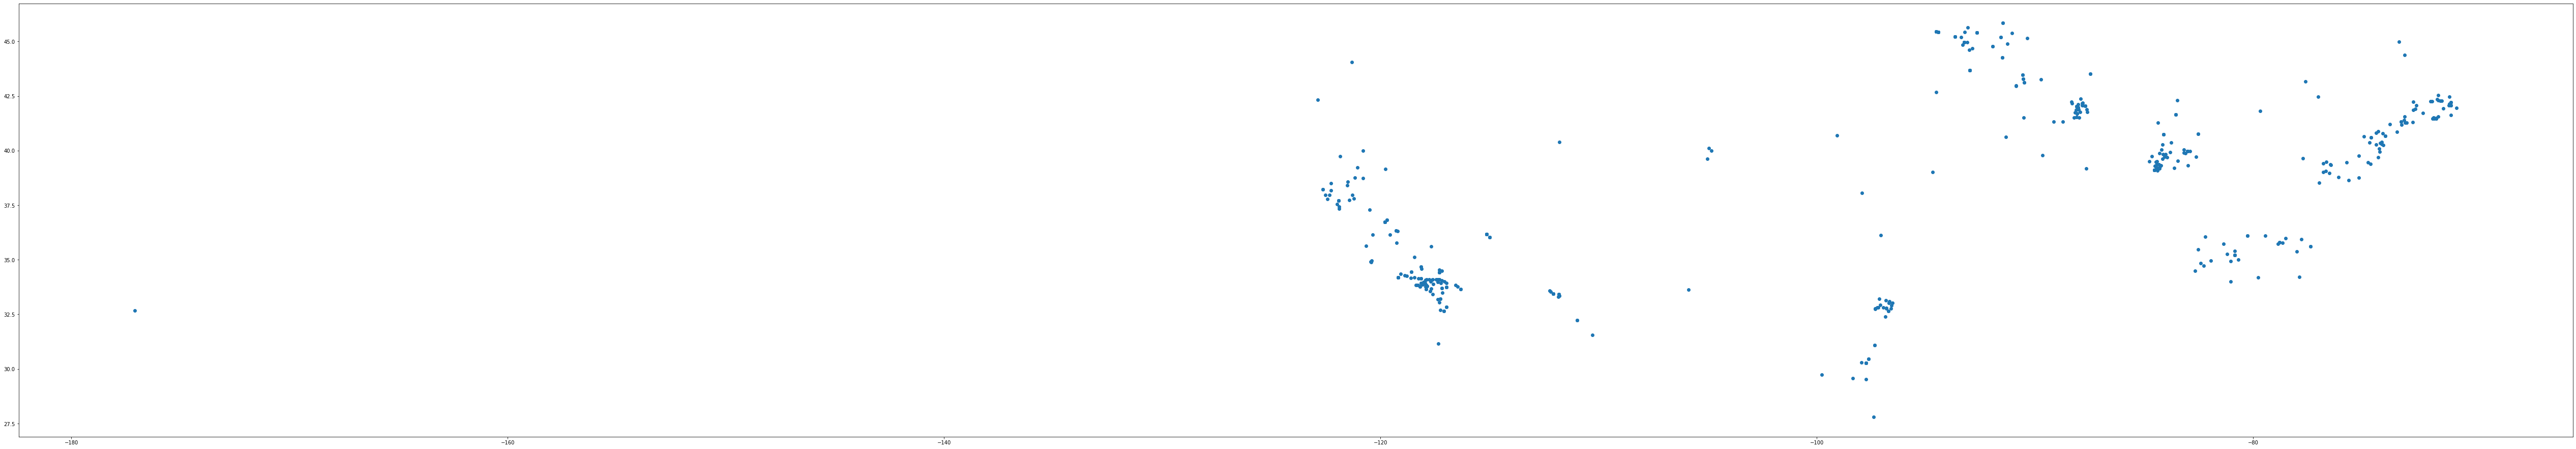

In [15]:
geo_df2.plot(figsize= (90,70))

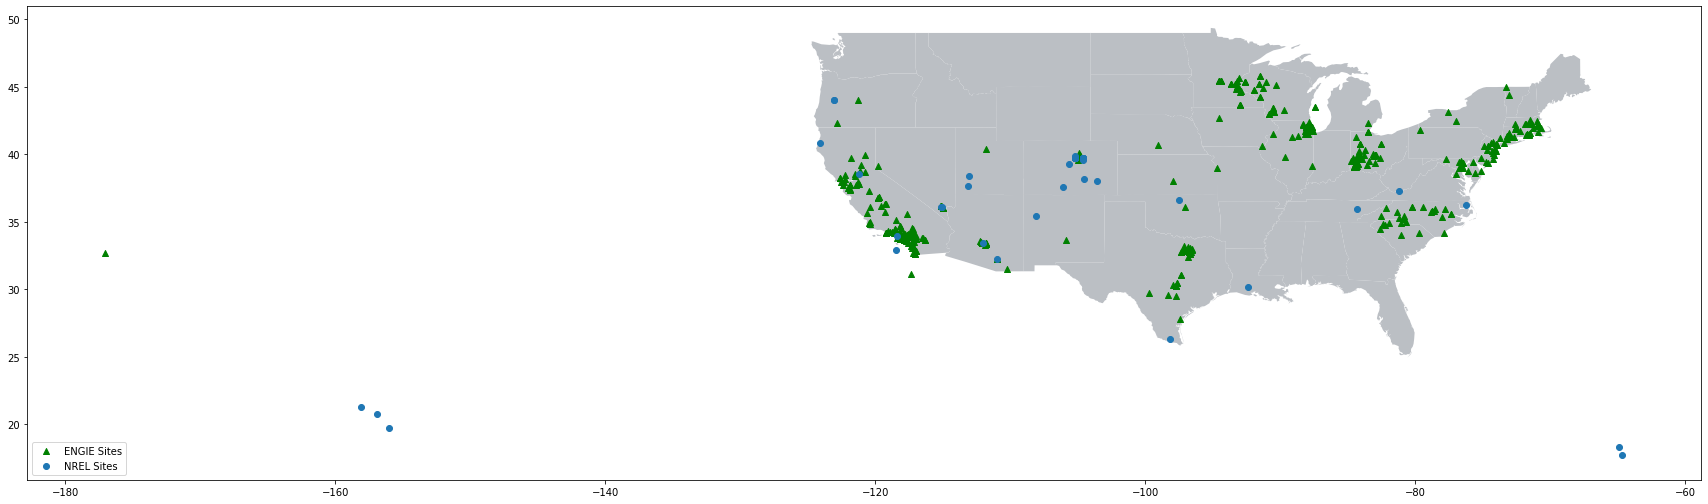

In [22]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_map[us_map['STATE_NAME'].isin(['Alaska','Hawaii'])== False].plot(ax=ax, color='#BBBFC4')
geo_df2.plot(ax=base, color = 'green', marker = '^' ,figsize=(30,20), label = 'ENGIE Sites')
geo_df.plot(ax=base , label = 'NREL Sites');
plt.legend(loc='lower left')